In [26]:
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")
import wave
import sys, os

In [28]:

sys.path.append(os.path.abspath(os.path.join('../scripts')))

from clean import Clean
from eda import EDA
cleaning_audios = Clean()

Successfully initialized clean class


In [4]:
#Display  samples and sample_rate 
train_audio_path = 'C:/Users/dell/Downloads/Compressed/AMHARIC/data/train/wav/tr_56_tr01056.wav'
samples, sample_rate = librosa.load(train_audio_path)
print(samples)
print(sample_rate)

[-0.0052909  -0.00607967 -0.00510738 ... -0.00638237 -0.0049306
  0.        ]
22050


In [7]:
audio, rate=librosa.load('C:/Users/dell/Downloads/Compressed/AMHARIC/data/train/wav/tr_56_tr01056.wav')

In [8]:
ipd.Audio(samples, rate=sample_rate)

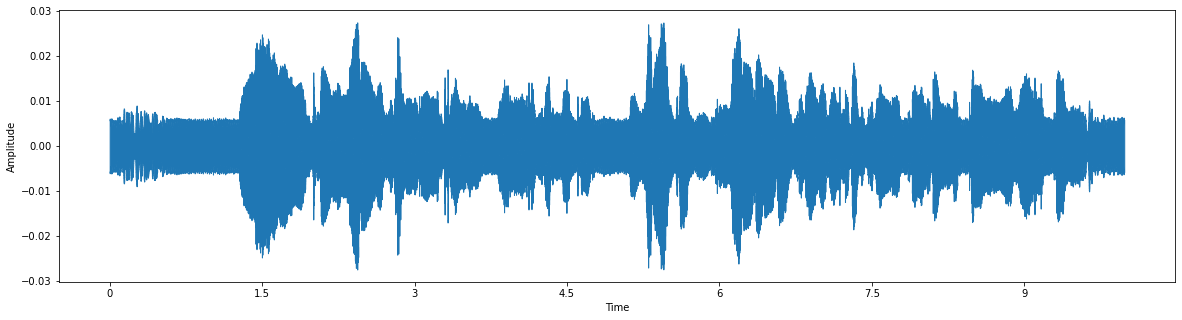

In [10]:
#plot our sample wav file 
%matplotlib inline
import librosa.display
#Plot the signal:
plt.figure(figsize=(20, 5))
plt.xlabel("Time")
plt.ylabel('Amplitude')
librosa.display.waveshow(samples, sr=sample_rate)

In [11]:
from numpy.lib.stride_tricks import as_strided
def spectrogram(samples, fft_length=256, sample_rate=2, hop_length=128):
    """
    Compute the spectrogram for a real signal.
    The parameters follow the naming convention of
    matplotlib.mlab.specgram

    Args:
        samples (1D array): input audio signal
        fft_length (int): number of elements in fft window
        sample_rate (scalar): sample rate
        hop_length (int): hop length (relative offset between neighboring
            fft windows).

    Returns:
        x (2D array): spectrogram [frequency x time]
        freq (1D array): frequency of each row in x

    Note:
        This is a truncating computation e.g. if fft_length=10,
        hop_length=5 and the signal has 23 elements, then the
        last 3 elements will be truncated.
    """
    assert not np.iscomplexobj(samples), "Must not pass in complex numbers"

    window = np.hanning(fft_length)[:, None]
    window_norm = np.sum(window**2)

    # The scaling below follows the convention of
    # matplotlib.mlab.specgram which is the same as
    # matlabs specgram.
    scale = window_norm * sample_rate

    trunc = (len(samples) - fft_length) % hop_length
    x = samples[:len(samples) - trunc]

    # "stride trick" reshape to include overlap
    nshape = (fft_length, (len(x) - fft_length) // hop_length + 1)
    nstrides = (x.strides[0], x.strides[0] * hop_length)
    x = as_strided(x, shape=nshape, strides=nstrides)

    # window stride sanity check
    assert np.all(x[:, 1] == samples[hop_length:(hop_length + fft_length)])

    # broadcast window, compute fft over columns and square mod
    x = np.fft.rfft(x * window, axis=0)
    x = np.absolute(x)**2

    # scale, 2.0 for everything except dc and fft_length/2
    x[1:-1, :] *= (2.0 / scale)
    x[(0, -1), :] /= scale

    freqs = float(sample_rate) / fft_length * np.arange(x.shape[0])

    return x, freqs

In [19]:
spe_samples,frequency=spectrogram(samples)

In [13]:
frequency

array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
       0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
       0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
       0.140625 , 0.1484375, 0.15625  , 0.1640625, 0.171875 , 0.1796875,
       0.1875   , 0.1953125, 0.203125 , 0.2109375, 0.21875  , 0.2265625,
       0.234375 , 0.2421875, 0.25     , 0.2578125, 0.265625 , 0.2734375,
       0.28125  , 0.2890625, 0.296875 , 0.3046875, 0.3125   , 0.3203125,
       0.328125 , 0.3359375, 0.34375  , 0.3515625, 0.359375 , 0.3671875,
       0.375    , 0.3828125, 0.390625 , 0.3984375, 0.40625  , 0.4140625,
       0.421875 , 0.4296875, 0.4375   , 0.4453125, 0.453125 , 0.4609375,
       0.46875  , 0.4765625, 0.484375 , 0.4921875, 0.5      , 0.5078125,
       0.515625 , 0.5234375, 0.53125  , 0.5390625, 0.546875 , 0.5546875,
       0.5625   , 0.5703125, 0.578125 , 0.5859375, 0.59375  , 0.6015625,
       0.609375 , 0.6171875, 0.625    , 0.6328125, 

In [14]:
#function that load text file and change it to Dictionary 
def t_loader(filename):
  name_to_text = {}
  with open (filename, encoding="utf-8")as f:
    f.readline()
    for line in f:
          line = line.strip()
          alist = line.split(' ', 1)
          key, values = alist[0], alist[1:]
          str1 = ''.join(str(e) for e in values)
          name_to_text[key] = str1
  #print(values)
  return name_to_text

In [17]:
transcription=t_loader("'C:/Users/dell/Downloads/Compressed/AMHARIC/data/train/text.txt")
transcription

In [18]:
def meta_data(trans, path ):
  target=[]
  features=[]
  filenames=[]
  duration_of_recordings=[]
  for k in trans:
    filename=path+k +".wav"
    filenames.append(filename)
    audio, fs = librosa.load(filename, sr=None)
    duration_of_recordings.append(float(len(audio)/fs))
   
    lable = trans[k]
    target.append(lable)
  return filenames, target,duration_of_recordings

In [ ]:
#export data to csv and save as dataS.csv 
import csv
with open('/content/drive/My Drive/dataS.csv', 'w') as f:
    for key in transcription.keys():
        f.write("%s,%s\n"%(key,transcription[key]))

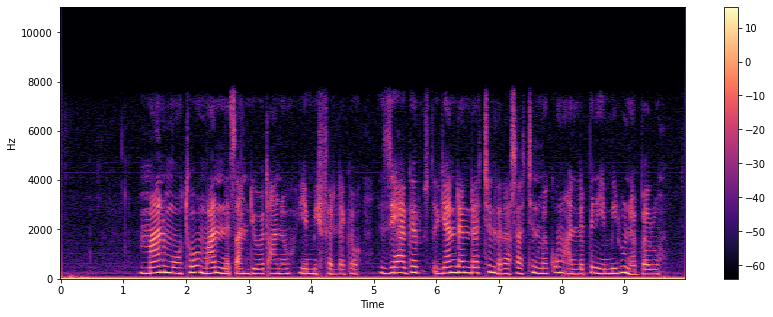

In [26]:
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

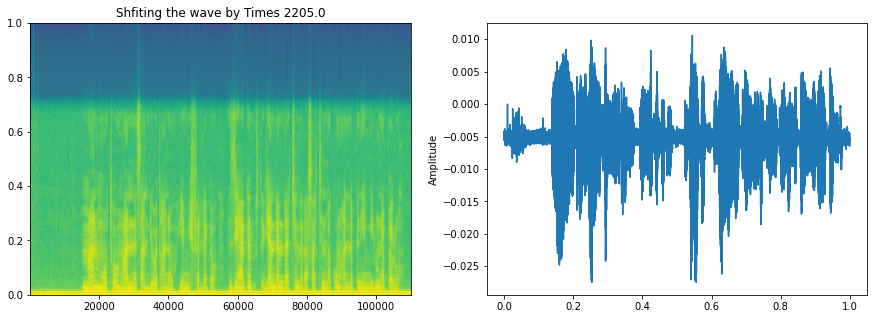

In [27]:
def plot_spec(data:np.array,sr:int) -> None:
  '''
  Function for plotting spectrogram along with amplitude wave graph
  '''
  
  fig, ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].title.set_text(f'Shfiting the wave by Times {sr/10}')
  ax[0].specgram(data,Fs=2)
  ax[1].set_ylabel('Amplitude')
  ax[1].plot(np.linspace(0,1,len(data)), data)

wav_roll = np.roll(samples,int(sample_rate/10))
plot_spec(data=wav_roll,sr=sample_rate)
ipd.Audio(wav_roll,rate=sample_rate)

(20, 430)


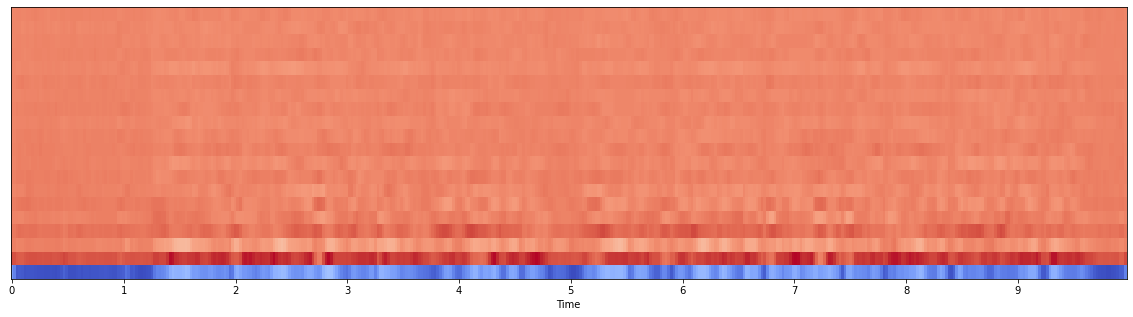

In [28]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(samples, sr=sample_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

### to stereo convrsion

In [29]:
cleaning_audios.convert_channels("../data_test/tr_1_tr01001.wav", "C:/Users/Gezahegne/10-Accademy/Week-4/tr_1_tr01001_2.wav")

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=73728, comptype='NONE', compname='not compressed')
succesffully converted to stereo


### Standardizing

In [33]:
amharic_recordings = cleaning_audios.load_audios('amharic',files=amharic_data.key.to_list()[0:NO_OBSERVATIOINS])

In [34]:
rates = []
for recording in amharic_recordings:
    _,rate,_ = recording
    rates.append(rate)
amharic_data_df['rate'] = rates

ValueError: not enough values to unpack (expected 3, got 1)